Working with Outliers

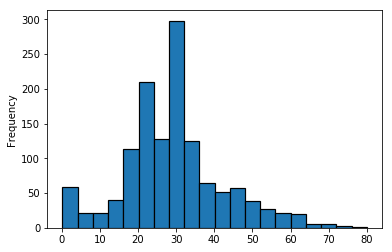

In [10]:
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
datacsv=os.path.join(os.getcwd(),"data","data.csv")
df = pd.read_csv(datacsv, index_col="PassengerId")
%matplotlib inline
df.Age.plot(kind="hist", bins=20, edgecolor='black', linewidth=1.2)

In [12]:
df.loc[df.Age > 70]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,Mr
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,Mr
494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,Mr
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,Mr
852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,Mr
988,-999,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,Mrs


Current size: [12.0, 9.0]


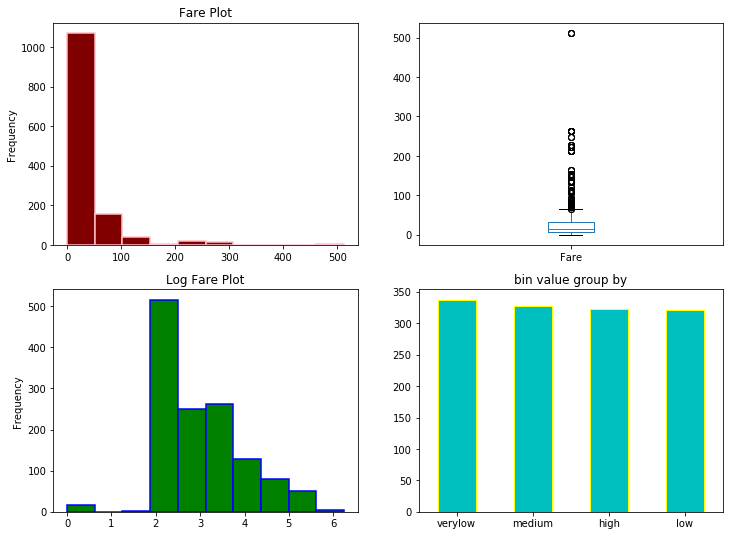

In [23]:
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
fig, axes = plt.subplots(nrows=2, ncols=2)
df.Fare.plot(kind="hist", rot=0, title="Fare Plot", color="maroon",
                                 ax=axes[0,0], edgecolor='pink', linewidth=1.5)
df.Fare.plot(kind="box",ax=axes[0,1])
import numpy as np
logfare = np.log(df.Fare+1.0)
logfare.plot(kind="hist", rot=0, title="Log Fare Plot", color="green",
                                 ax=axes[1,0], edgecolor='blue', linewidth=1.5)
pd.qcut(df.Fare, 4, labels=["verylow", "low", "medium", "high"]).value_counts().plot(kind="bar", 
                                                                                         rot=0,
                                                                                         title="bin value group by",
                                                                                         color="c",
                                                                                         edgecolor="yellow",
                                                                                         linewidth=1)

In [24]:
df.loc[df.Fare == df.Fare.max()]
df["Farebin"] = pd.qcut(df.Fare, 4, labels=["verylow", "low", "medium", "high"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 13 columns):
Survived    1309 non-null int64
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1309 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Title       1309 non-null object
Farebin     1309 non-null category
dtypes: category(1), float64(2), int64(4), object(6)
memory usage: 134.4+ KB


In [27]:
df["AgeState"] = np.where(df.Age >=18, "Adult", "Child")
df["FamilySize"] = df.SibSp + df.Parch + 1

AgeState,Adult,Child
Survived,,
0,495,54
1,279,63


In [28]:
pd.crosstab(df[df.Survived != -999].Survived,df[df.Survived != -999].AgeState)
pd.crosstab(df[df.Survived != -999].Survived,df[df.Survived != -999].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


In [30]:
df["IsMother"] = np.where(((df.Sex == "Female") & (df.Parch > 0) & (df.Age > 18) & (df.Title != "Miss")), 1, 0)

In [33]:
# Cabin T is not correct
from pprint import pprint as pp
df.loc[df.Cabin=="T", "Cabin"] = np.NaN
pp(df.Cabin.unique())
df["Deck"] = df.Cabin.map(lambda x: np.where(pd.notnull(x), str(x)[0].upper(), 'Z'))
df.info()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

# Feature Encoding

In [34]:
df["IsMale"] = np.where(df.Sex == "male", 1, 0)

In [37]:
df = pd.get_dummies(df, columns=["Deck", "Pclass", "Title", "Farebin", "Embarked", "AgeState"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 39 columns):
Survived           1309 non-null int64
Name               1309 non-null object
Sex                1309 non-null object
Age                1309 non-null float64
SibSp              1309 non-null int64
Parch              1309 non-null int64
Ticket             1309 non-null object
Fare               1309 non-null float64
Cabin              294 non-null object
FamilySize         1309 non-null int64
IsMother           1309 non-null int64
IsMale             1309 non-null int64
Deck_A             1309 non-null uint8
Deck_B             1309 non-null uint8
Deck_C             1309 non-null uint8
Deck_D             1309 non-null uint8
Deck_E             1309 non-null uint8
Deck_F             1309 non-null uint8
Deck_G             1309 non-null uint8
Deck_Z             1309 non-null uint8
Pclass_1           1309 non-null uint8
Pclass_2           1309 non-null uint8
Pclass_3           1309 non-

In [39]:
df.drop(["Cabin", "Name", "Sex", "Ticket", "Parch", "SibSp"], axis=1, inplace=True)

In [41]:
cols = [c for c in df.columns if c != "Survived"] + ["Survived", ]
cols
df = df[cols]

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 33 columns):
Age                1309 non-null float64
Fare               1309 non-null float64
FamilySize         1309 non-null int64
IsMother           1309 non-null int64
IsMale             1309 non-null int64
Deck_A             1309 non-null uint8
Deck_B             1309 non-null uint8
Deck_C             1309 non-null uint8
Deck_D             1309 non-null uint8
Deck_E             1309 non-null uint8
Deck_F             1309 non-null uint8
Deck_G             1309 non-null uint8
Deck_Z             1309 non-null uint8
Pclass_1           1309 non-null uint8
Pclass_2           1309 non-null uint8
Pclass_3           1309 non-null uint8
Title_Lady         1309 non-null uint8
Title_Master       1309 non-null uint8
Title_Miss         1309 non-null uint8
Title_Mr           1309 non-null uint8
Title_Mrs          1309 non-null uint8
Title_Officer      1309 non-null uint8
Title_Sir          1309 non-nul

In [46]:
processedfolder=os.path.join(os.getcwd(),"data","processed")
os.makedirs(processedfolder)
trpt = os.path.join(processedfolder, "train.csv")
tspt = os.path.join(processedfolder, "test.csv")
df.loc[df.Survived != -999].to_csv(trpt)
cl = [c for c in df.columns if c != "Survived"]
df.loc[df.Survived == -999, cl].to_csv(tspt)

TypeError: unsupported operand type(s) for -: 'list' and 'str'